# Multiple Linear Regression

### Bike Sharing Assignment
#### Problem Statement
> A bike-sharing system is a service in which bikes are made available
> for shared use to individuals on a short term basis for a price or free.
> A US bike-sharing provider BoomBikes aspires to understand the demand for shared bikes among the people
> They have contracted a consulting company to understand the factors on which the demand for these shared bikes
> depends. Specifically, they want to understand the factors affecting the demand for these shared bikes
> in the American market. The company wants to know the following:

> 1. Which variables are significant in predicting the demand for shared bikes
> 2. How well those variables describe the bike demands

### Business Goal
Create a model to identify the demand for shared bikes with the available independent variables.

### Steps followed
1. Understand the data
2. Data cleaning 
3. Visualizing the data
4. Data prep (train-test split, rescaling)
5. Training the model
6. Residual analysis
7. Predictions and evaluations on the test set
8. Interpretation of linear model (Final Summary)

### Step 1: Understand the data

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data
bike_sharing = pd.read_csv('./day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_sharing.shape

(730, 16)

In [4]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2: Data cleaning

#### 2.1 Fix rows

In [6]:
# 1. Delete incorrect rows (unnecessary header & footer rows) -> This is not applicable to current dataset
# 2. Delete summary rows (Total & subtotal rows) -> This is not applicable to current dataset
# 3. Delete extra rows (column number indicator rows, blank rows)

bike_sharing[bike_sharing.isna().all(axis=1)] #### No blank rows in this dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


#### 2.2 Fix columns

In [7]:
# 1. Delete unnecessary columns
  # instant (record index is not useful / required for this analysis)
  # casual and registered
columns_to_be_dropped = ['instant', 'casual', 'registered']
bike_sharing.drop(columns_to_be_dropped, axis = 1, inplace=True)

# 2. Derived columns - day from 'dteday' column
bike_sharing['day'] = pd.to_datetime(bike_sharing['dteday'], format='%d-%m-%Y').dt.day

# 3. Drop 'dteday' column - date can be formed using this day, mnth, yr columns
bike_sharing.drop(['dteday'], axis = 1, inplace=True)

# 4. Renaming columns for better understanding
bike_sharing.rename(columns = { 'yr': 'year', 'mnth': 'month','weekday': 'week_day', 'workingday': 'working_day',
                              'weathersit': 'weather_condition', 'atemp': 'feeling_temp', 'hum': 'humidity',
                              'cnt': 'total_count'}, inplace=True)


#### 2.3 Standardize values

In [8]:
# Convert 'weather_condition', 'season', 'week_day' and  feature values into categorical string values

bike_sharing['season'] = bike_sharing['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_sharing['weather_condition'] = bike_sharing['weather_condition'].map(
    {1:'clear', 2:'mist', 3:'light_rain', 4:'heavy_rain'})
bike_sharing['week_day'] = bike_sharing['week_day'].map(
    {0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})
bike_sharing['month'] = bike_sharing['month'].map(
    {1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul',
     8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

### Step 3: Visualize the data

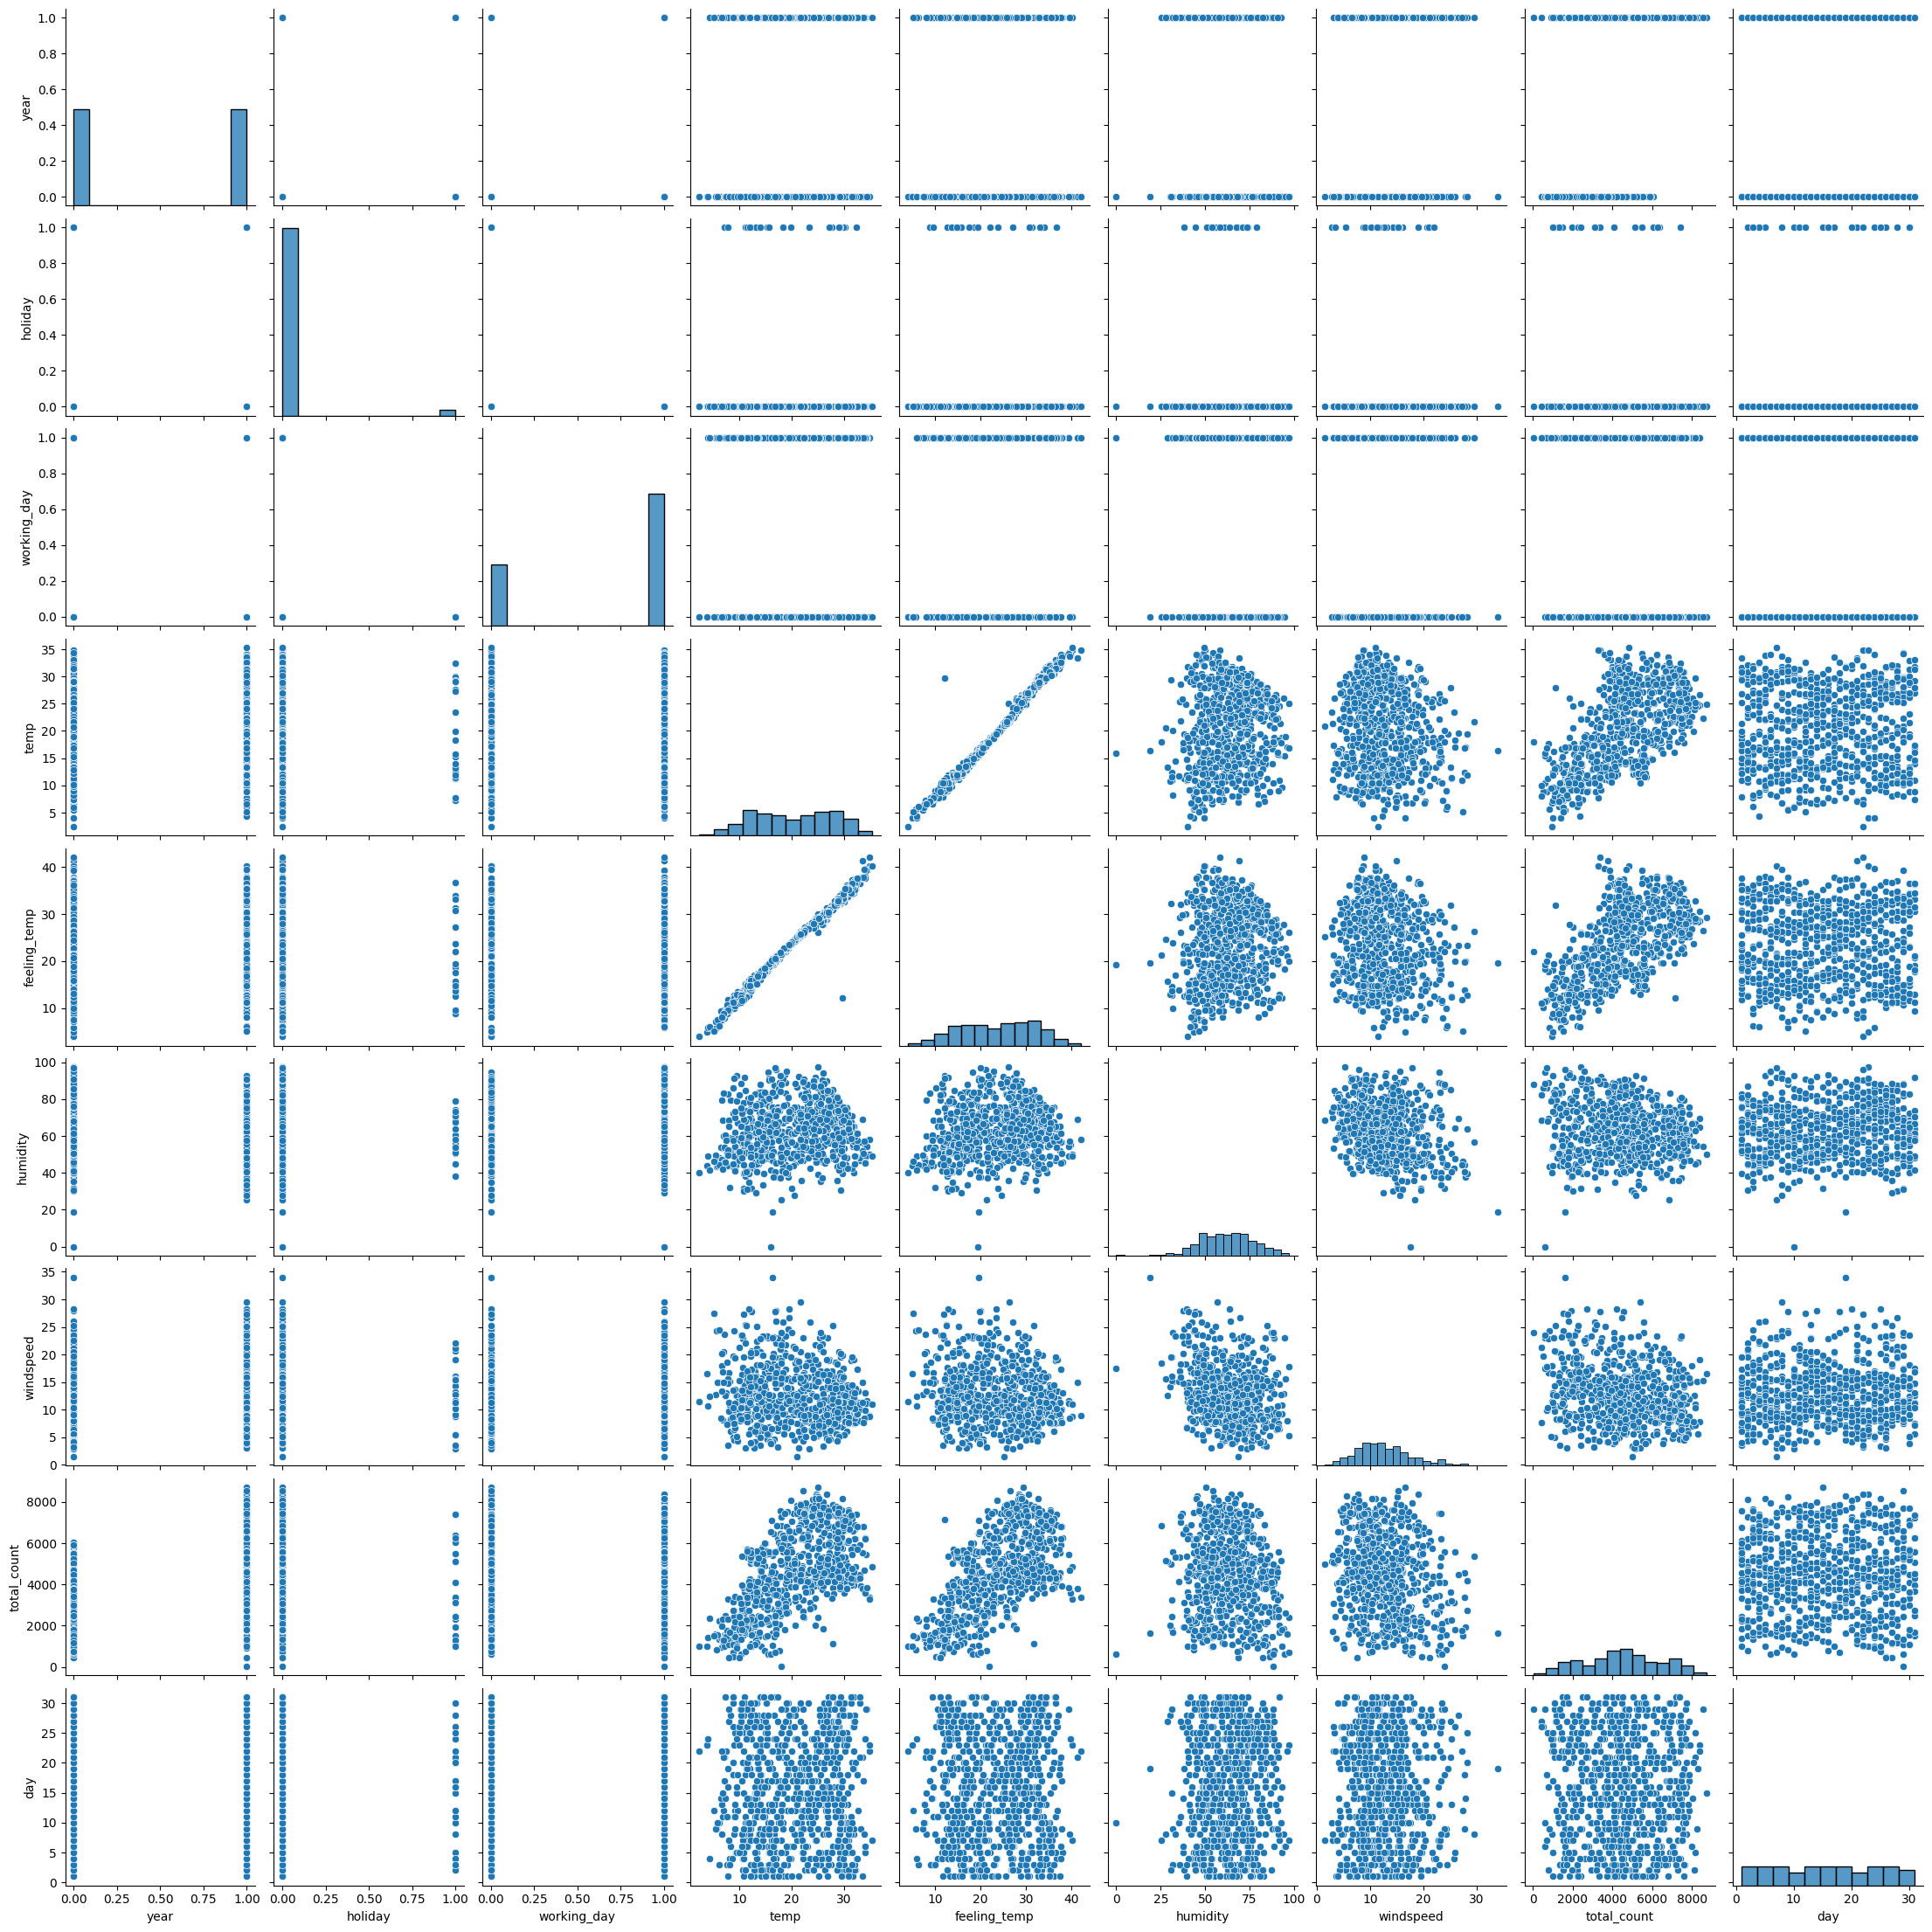

In [9]:
# 1. Pair plot for numerical columns
sns.pairplot(bike_sharing)
plt.show()

#### Inferences
- count of rented bikes is more in 2019 compared to 2018
- Bikes are rented more in numbers when it's not a holiday
- Bike rented count is more or less similar for both working and non-working days
- Bike rented count is linearly dependent with temperature (positive correlation)
- Bike rented count is linearly dependented with feeling temperature (positive correlation)

> Few variables like temp, feeling temp are linearly related to target variable 'total count'.
> Hence, linear regression model is suitable for this dataset.

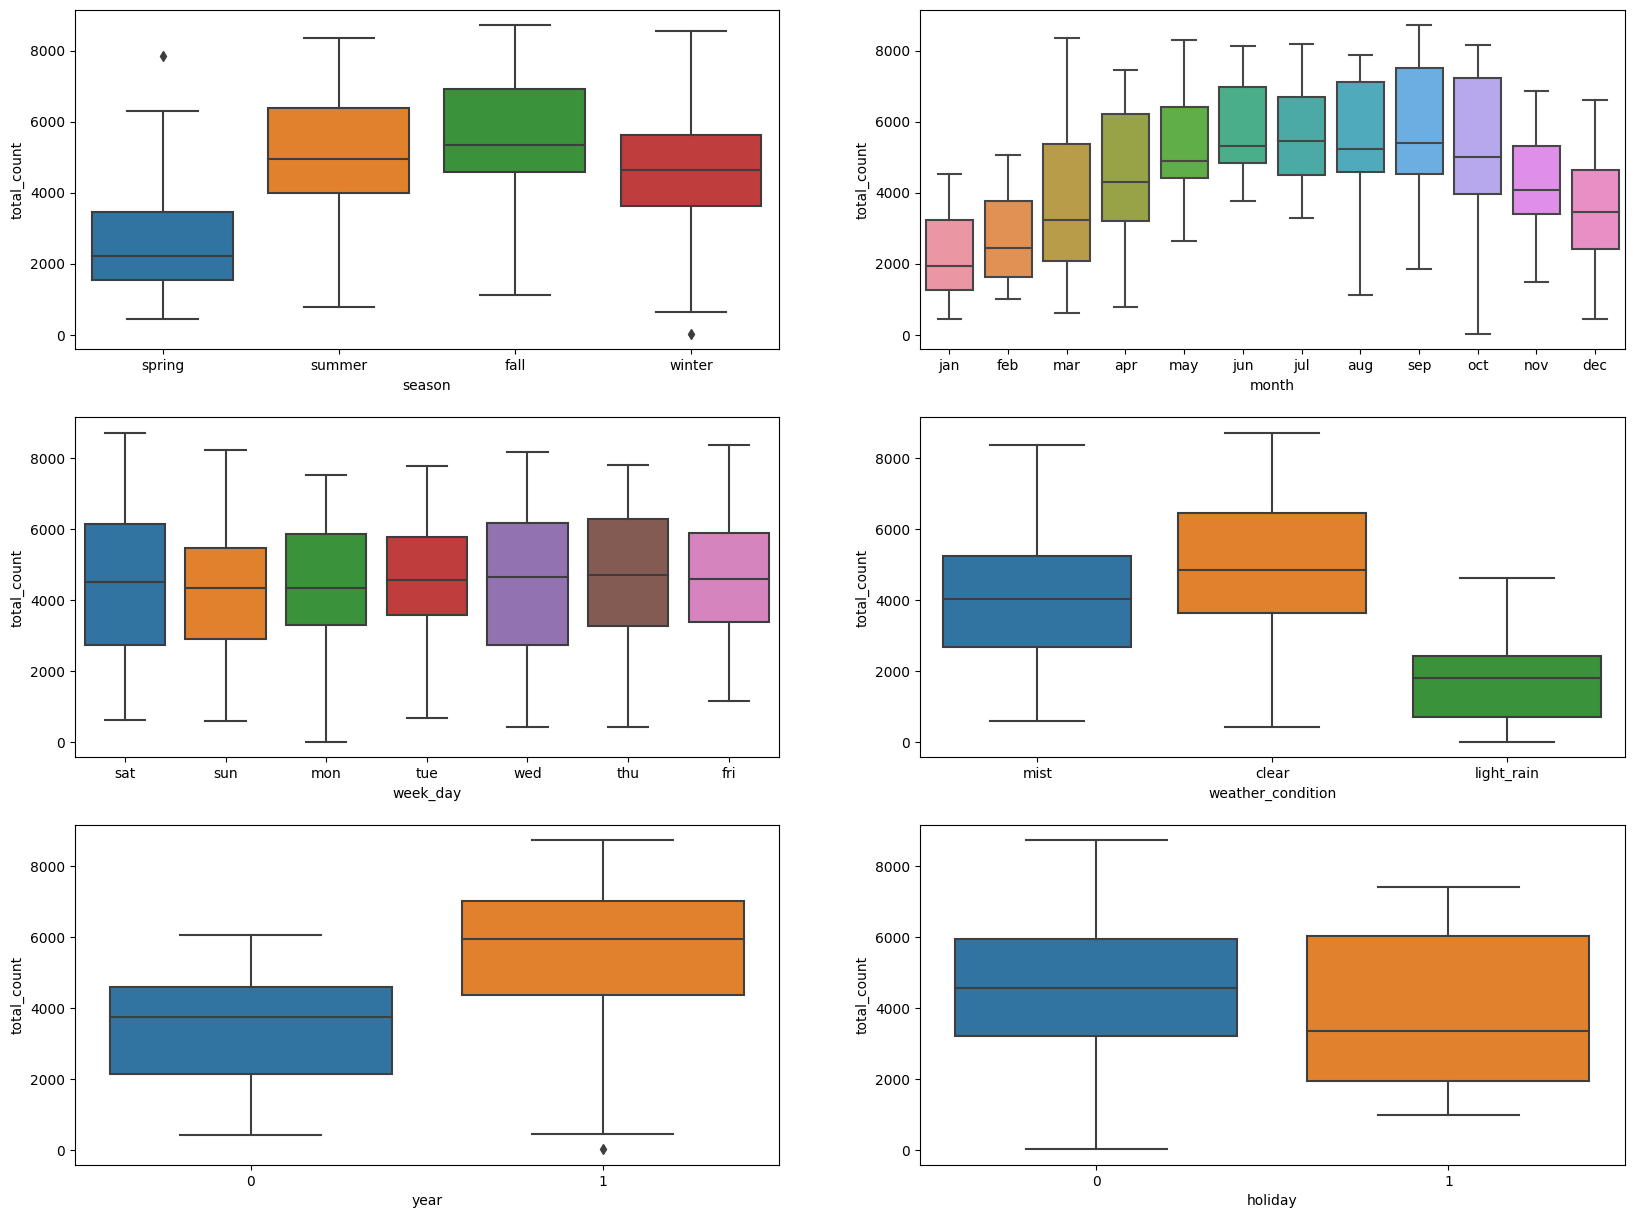

In [10]:
# 2. Visualize categorical columns using box plot
plt.figure(figsize=(20, 15))

plt.subplot(3, 2, 1)
sns.boxplot(data=bike_sharing, x='season', y='total_count')

plt.subplot(3, 2, 2)
sns.boxplot(data=bike_sharing, x='month', y='total_count')

plt.subplot(3, 2, 3)
sns.boxplot(data=bike_sharing, x='week_day', y='total_count')

plt.subplot(3, 2, 4)
sns.boxplot(data=bike_sharing, x='weather_condition', y='total_count')

plt.subplot(3, 2, 5)
sns.boxplot(data=bike_sharing, x='year', y='total_count')

plt.subplot(3, 2, 6)
sns.boxplot(data=bike_sharing, x='holiday', y='total_count')


plt.show()

#### Inferences:
- Bikes are rented more in fall and summer compared to other seasons (winter and spring)
- Bikes are rented more between May and September compared to other months
- Bikes are rented more when weather condition is clear or mist
- Bikes are rented more on Saturday followed by sunday
- Bikes are rented more in 2019 compared to 2018. Looks like the service usage is increasing YOY
- Bikes are rented less when it's a holiday

In [11]:
### 3. Remove outliers
# remove outliers in spring season
bike_sharing = bike_sharing[~((bike_sharing['season'] == 'spring') & (bike_sharing['total_count'] > 7000))]

# remove outliers in winter season
bike_sharing = bike_sharing[~((bike_sharing['season'] == 'winter') & (bike_sharing['total_count'] < 500))]

### Step 4: Data preparation for modelling

In [12]:
# Encoding - categorical variables (season, week_day, weather_condition) to dummy variables
season = pd.get_dummies(bike_sharing['season'], drop_first=True)
week_day = pd.get_dummies(bike_sharing['week_day'], drop_first=True)
weather_condition = pd.get_dummies(bike_sharing['weather_condition'], drop_first=True)
month = pd.get_dummies(bike_sharing['month'], drop_first=True)

# Concat dummy dataframe with original dataframe
bike_sharing = pd.concat([bike_sharing, season, week_day, weather_condition, month], axis=1)

# Drop unncessary columns
bike_sharing = bike_sharing.drop(['season', 'week_day', 'weather_condition', 'month'], axis=1)

#### Note:
##### Encoding season column
- 000 - Fall season
- 100 - Spring season
- 010 - Summer season
- 001 - Winter season

##### Encoding weak_day column
- 000000 - Friday
- 100000 - Monday
- 010000 - Saturday
- 001000 - Sunday
- 000100 - Thursday
- 000010 - Tuesday
- 000001 - Wednesday

##### Encoding weather_condition column
- 00 - clear
- 10 - light rain
- 01 - mist

##### Encoding month column
- 100000000000 - Jan
- 010000000000 - Feb
- 001000000000 - Mar
- 000100000000 - Apr
- 000010000000 - May
- 000001000000 - Jun
- 000000100000 - Jul
- 000000010000 - Aug
- 000000001000 - Sep
- 000000000100 - Oct
- 000000000010 - Nov
- 000000000001 - Dec

In [13]:
# Split the data into training (70%) and test set (30%)
df_train, df_test = train_test_split(bike_sharing, train_size=0.7, test_size=0.3, random_state=42)

In [14]:
# Rescaling features (faster convergence and easy interpretation)

# 1. Instantiate an object
scaler = MinMaxScaler()

# Create a list of numeric variables
num_vars = ['temp', 'feeling_temp', 'humidity', 'windspeed', 'total_count']

# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

### Step 5: Training the model

In [15]:
# x_train, y_train
y_train = df_train.pop('total_count')
X_train = df_train

In [16]:
# Building model using linear regression from sklearn library
def build_linear_model_using_sklearn(X_train, y_train):
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    return lm


# Run RFE
def run_rfe(linear_model, no_of_features):
    rfe = RFE(linear_model, n_features_to_select=no_of_features)
    
    return rfe


# Building model using stats model for detailed statistics
def build_linear_model_using_statsmodel(X_train, y_train):
    X_train_sm = sm.add_constant(X_train)
    
    # Running the linear model
    lm = sm.OLS(y_train, X_train_sm).fit()
    
    # Summary of linear model
    print(lm.summary())
    
    return lm


# VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    
    return vif

In [17]:
# Select top 20 features using Recursive feature elimination

lm = build_linear_model_using_sklearn(X_train, y_train)
rfe = run_rfe(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [18]:
print("\n\nFeature ordering results by RFE")
print(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), sep="\n")
    
print("\n\nFeature(s) removed by RFE approach")
print(X_train.columns[~rfe.support_])

selected_features = X_train.columns[rfe.support_]
X_train_rfe = X_train[selected_features]



Feature ordering results by RFE
[('year', True, 1), ('holiday', True, 1), ('working_day', True, 1), ('temp', True, 1), ('feeling_temp', True, 1), ('humidity', True, 1), ('windspeed', True, 1), ('day', False, 11), ('spring', True, 1), ('summer', False, 3), ('winter', True, 1), ('mon', False, 4), ('sat', True, 1), ('sun', True, 1), ('thu', False, 10), ('tue', False, 8), ('wed', False, 9), ('light_rain', True, 1), ('mist', True, 1), ('aug', False, 6), ('dec', True, 1), ('feb', True, 1), ('jan', True, 1), ('jul', True, 1), ('jun', False, 5), ('mar', False, 2), ('may', True, 1), ('nov', True, 1), ('oct', False, 7), ('sep', True, 1)]


Feature(s) removed by RFE approach
Index(['day', 'summer', 'mon', 'thu', 'tue', 'wed', 'aug', 'jun', 'mar',
       'oct'],
      dtype='object')


In [19]:
# Create linear model 1
lr_model = build_linear_model_using_statsmodel(X_train_rfe, y_train)
calculate_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     149.9
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          6.48e-190
Time:                        11:31:36   Log-Likelihood:                 496.71
No. Observations:                 509   AIC:                            -953.4
Df Residuals:                     489   BIC:                            -868.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2660      0.029      9.184   

,Features,VIF
3,temp,51.84
4,feeling_temp,50.93
2,working_day,49.61
9,sat,12.41
10,sun,12.40
7,spring,4.44
1,holiday,3.56
15,jan,2.71
14,feb,2.44
8,winter,2.29


#### Observation: feeling_temp feature has high p-value and high VIF. Hence, the next step is to dropping feeling_temp feature

In [20]:
# Create linear model 2
X_train_new = X_train_rfe.drop(['feeling_temp'], axis = 1)
lr_model = build_linear_model_using_statsmodel(X_train_new, y_train)
calculate_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     158.4
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          5.53e-191
Time:                        11:31:36   Log-Likelihood:                 496.62
No. Observations:                 509   AIC:                            -955.2
Df Residuals:                     490   BIC:                            -874.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2670      0.029      9.257      

,Features,VIF
2,working_day,49.22
9,sun,12.32
8,sat,12.32
6,spring,4.44
3,temp,3.89
1,holiday,3.55
14,jan,2.69
13,feb,2.44
7,winter,2.28
4,humidity,1.92


#### Observation: There's no feature with high p-value and high VIF. So, the next step is to drop the feature with high collinearity which is working_day feature

In [21]:
# Create linear model 3
X_train_new = X_train_new.drop(['working_day'], axis = 1)
lr_model = build_linear_model_using_statsmodel(X_train_new, y_train)
calculate_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     158.4
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          5.53e-191
Time:                        11:31:36   Log-Likelihood:                 496.62
No. Observations:                 509   AIC:                            -955.2
Df Residuals:                     490   BIC:                            -874.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3652      0.036     10.235      0.0

,Features,VIF
3,humidity,27.12
2,temp,18.50
5,spring,5.34
4,windspeed,5.15
6,winter,2.83
13,jan,2.78
12,feb,2.57
10,mist,2.31
0,year,2.09
16,nov,1.74


#### Observation: There's no feature with high p-value and high VIF. The next step is to drop the feature with high VIF which is humidity

In [22]:
# Create linear model 4
X_train_new = X_train_new.drop(['humidity'], axis = 1)
lr_model = build_linear_model_using_statsmodel(X_train_new, y_train)
calculate_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     162.3
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          5.94e-189
Time:                        11:31:36   Log-Likelihood:                 489.06
No. Observations:                 509   AIC:                            -942.1
Df Residuals:                     491   BIC:                            -865.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2843      0.029      9.732      0.0

,Features,VIF
2,temp,6.01
3,windspeed,5.13
4,spring,4.93
12,jan,2.64
11,feb,2.52
5,winter,2.41
0,year,2.09
15,nov,1.70
10,dec,1.58
9,mist,1.54


#### Observation: There's no feature with high p-value and high VIF. The next step is to drop windspeed feature which is having high VIF
#### Note: Temp column has higher VIF than windspeed. But temp column is a must to determine demand for bike sharing. Hence, choosing windspeed

In [23]:
# Create linear model 5
X_train_new = X_train_new.drop(['windspeed'], axis = 1)
lr_model = build_linear_model_using_statsmodel(X_train_new, y_train)
calculate_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     167.4
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          3.45e-187
Time:                        11:31:36   Log-Likelihood:                 482.14
No. Observations:                 509   AIC:                            -930.3
Df Residuals:                     492   BIC:                            -858.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2339      0.026      8.952      0.0

,Features,VIF
3,spring,4.64
2,temp,3.68
11,jan,2.63
10,feb,2.52
4,winter,2.40
0,year,2.08
14,nov,1.68
9,dec,1.58
8,mist,1.52
12,jul,1.48


#### Observation: There's no feature with high VIF. The next step is to drop the feature with high p-value which is saturday

In [24]:
# Create linear model 6
X_train_new = X_train_new.drop(['sat'], axis = 1)
lr_model = build_linear_model_using_statsmodel(X_train_new, y_train)
calculate_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.9
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          2.57e-188
Time:                        11:31:36   Log-Likelihood:                 482.12
No. Observations:                 509   AIC:                            -932.2
Df Residuals:                     493   BIC:                            -864.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2345      0.026      9.079      0.0

,Features,VIF
3,spring,4.64
2,temp,3.48
10,jan,2.61
9,feb,2.51
4,winter,2.40
0,year,2.08
13,nov,1.67
8,dec,1.56
7,mist,1.52
11,jul,1.48


#### Observation: There's no feature with high VIF. The next step is to drop the feature with high p-value which is feb

In [25]:
# Create linear model 7
X_train_new = X_train_new.drop(['feb'], axis = 1)
lr_model = build_linear_model_using_statsmodel(X_train_new, y_train)
calculate_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.7
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          7.71e-189
Time:                        11:31:36   Log-Likelihood:                 480.63
No. Observations:                 509   AIC:                            -931.3
Df Residuals:                     494   BIC:                            -867.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2251      0.025      8.905      0.0

,Features,VIF
2,temp,3.46
4,winter,2.34
0,year,2.07
3,spring,2.03
9,jan,1.66
12,nov,1.65
7,mist,1.52
10,jul,1.48
8,dec,1.40
11,may,1.30


#### Observation: There is no multicollinearity between predictor variables (VIF < 5) and all variables have significant p-value (< 0.05)

### Step 6: Residual analysis

Text(0.5, 1.0, 'Error terms')

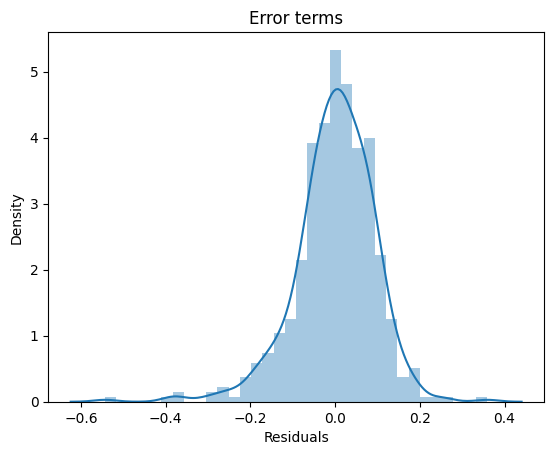

In [26]:
X_train_sm = sm.add_constant(X_train_new)
y_train_pred = lr_model.predict(X_train_sm)
residuals = y_train - y_train_pred
sns.distplot(residuals)

plt.xlabel('Residuals')
plt.title('Error terms')

#### Observation:
1. Error distribution is centered around 0
2. Error distribution follows normal distribution

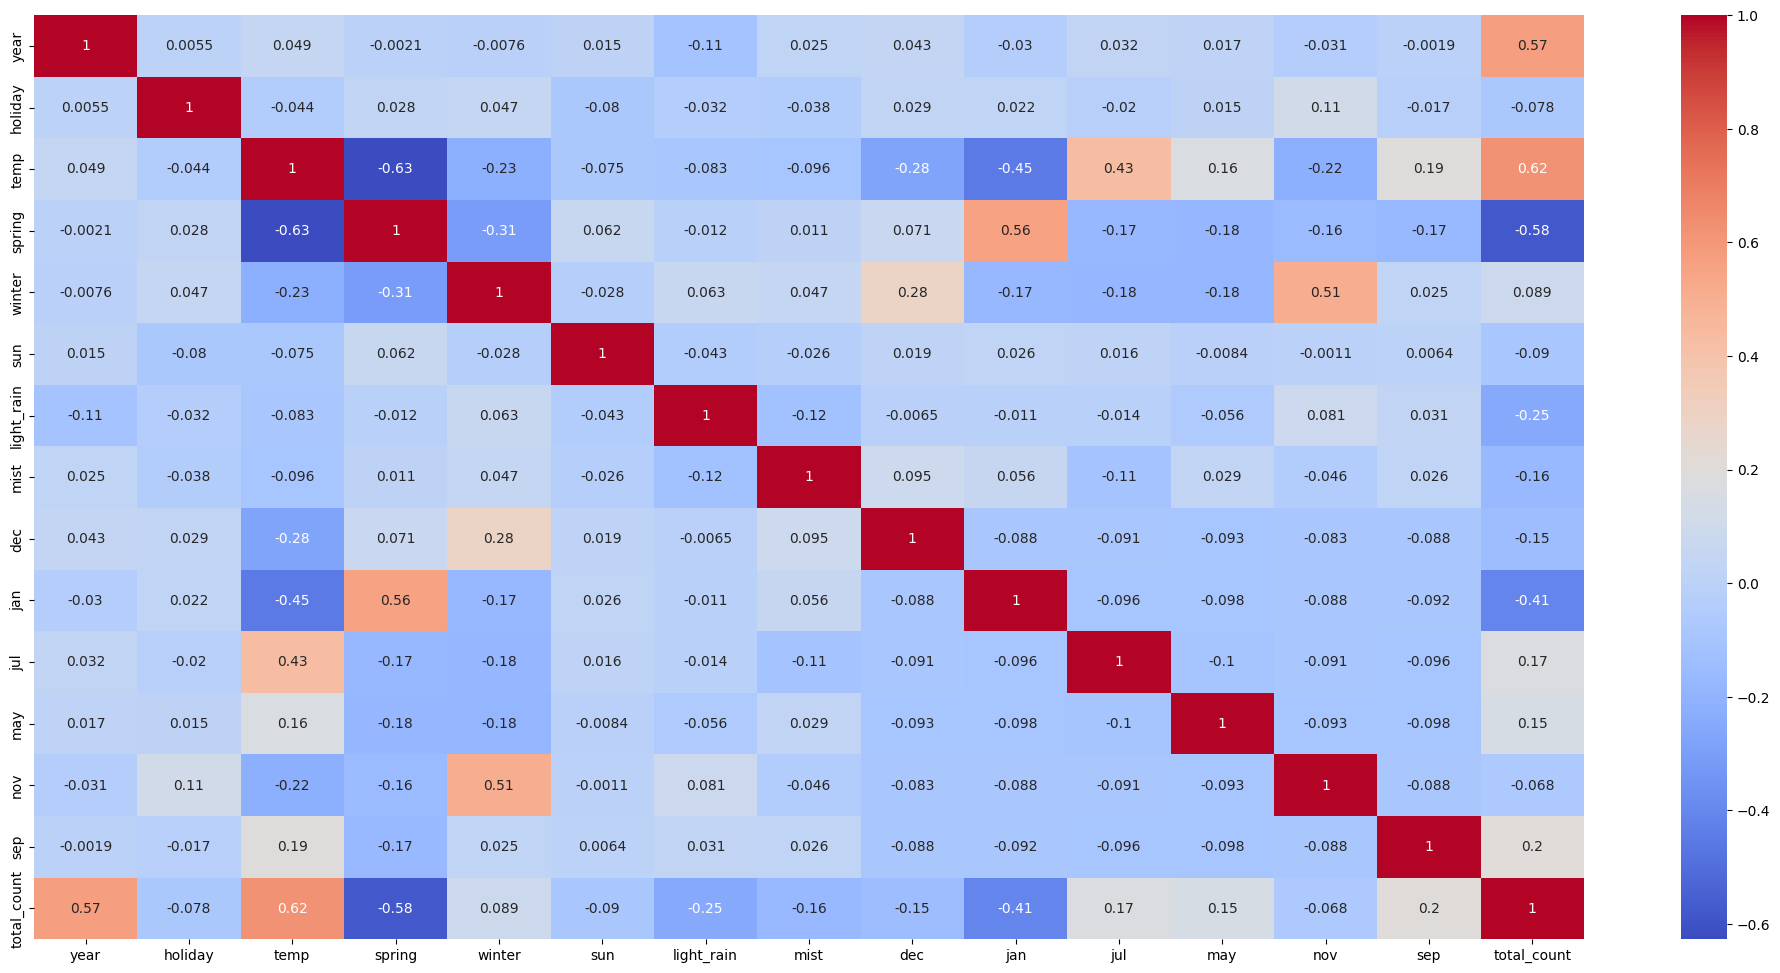

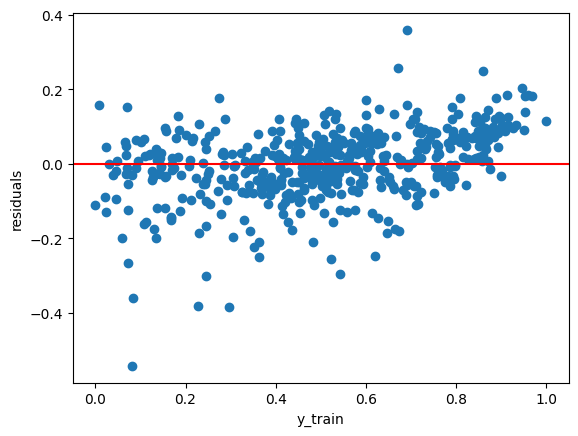

In [27]:
# Verify other linear model assumptions

# 1. Linear relationship between predictor and target variables
plt.figure(figsize=(25, 12))
sns.heatmap(pd.concat([X_train_new, y_train], axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()


# 2. Error terms have constant variance (homoscedasticity)
plt.scatter(x=y_train, y=residuals)
plt.axhline(0, color='r')
plt.xlabel('y_train')
plt.ylabel('residuals')
plt.show()

#### Observation:
1. All the predictor variables have linear relationship (positive/negative) with target variable 'total_count'
2. Error term is not dependent on another (no visible pattern seen)

### Step 7. Predictions and evaulations on test set

In [28]:
# Rescaling (only transform) features in test set similar to training set
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [29]:
# X_test, y_test
y_test = df_test.pop('total_count')
X_test = df_test[X_train_new.columns]

In [30]:
# Predict test data
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

In [31]:
# Evaluate test data using r^2
r2_score = r2_score(y_true=y_test, y_pred=y_test_pred)
print(f"R^2 value: {round(r2_score, 3)}")

R^2 value: 0.825


In [32]:
# Evaluate test data using adjusted r^2
no_of_predictor_variables = len(X_test.columns)
no_of_observations = X_test_sm.shape[0]
adjusted_r2 = 1 - (((1 - round(r2_score, 3))*(no_of_observations-1)) / (no_of_observations - no_of_predictor_variables - 1))
print(f"Adjusted R^2 value: {round(adjusted_r2, 3)}")

Adjusted R^2 value: 0.813


In [33]:
print("Coefficients of features in linear model")
round(lr_model.params, 3).sort_values(ascending=False)

Coefficients of features in linear model


temp          0.400
year          0.258
const         0.225
winter        0.102
sep           0.061
may           0.033
jan          -0.040
sun          -0.042
jul          -0.043
dec          -0.079
nov          -0.084
mist         -0.090
holiday      -0.093
spring       -0.141
light_rain   -0.270
dtype: float64

<h1 style="background-color:powderblue;">Final Summary</h1>

|Data Set    |R^2  |Adjusted R^2|
|------------|-----|------------|
|Training set|0.844|0.839|
| Test set   |0.825|0.813|

> Adjusted R^2 of test data set is within + or - 5% of training data set. Hence, we can consider this as a good model
that generalizes different data sets.


<span style="color:blue"> Significant variables for bike sharing prediction (high to low importance)</span>
1. temp
2. year
3. winter
4. sep
5. may
6. jan
7. sun
8. jul
9. dec
10. nov
11. mist
12. holiday
13. spring
14. light_rain


<span style="color:blue"> How well these variables describe the bike demand </span>
##### Equation of best fitted model
total_count = 0.225 + 0.4 * temp + 0.258 * year + 0.102 * winter + 0.061 * sep + 0.033 * may - 0.040 * jan -
    0.042 * sun - 0.043 * jul - 0.079 * dec - 0.084 * nov - 0.090 * mist - 0.093 * holiday - 0.141 * spring -
    0.270 * light_rain


#### For example, above best fit line equation says,
- Every year, demand for bikes will increase by 0.258 units
- For every unit increase in temp, demand for bikes will increase by 0.4
- For every unit increase in winter feature, demand for bikes will increase by 0.102 units